1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Divide the dataset into 2 training and test sets
4. Use logistic model Regression. Try to apply different *solver* and *penalty* to find the best one.
5. Perform model on training set and test set
6. Measure performance of the model.
7. Which metric is your main metric and why? Which solver and penalty have you chosen? (<= 100 words)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

- Age: This is the attribute that describes the age of the patient. There is data type $int64$, the highest value is 29, and the lowest is 77.
- Sex: This is the attribute indicating the gender of the patient, where 0 indicates male patient, 1 female patient.
- ChestPainType: This is the attribute that indicates the patient's chest pain level. With levels 0, 1, 2, and 3.
- RestingBP: This is the attribute that indicates the patient's blood pressure with data type $int64$, the value is in the range [94, 200]
- Cholesterol: This attribute indicates the patient's cholesterol level as measured in the hospital. Has the data type $int64$, where the value is in [126, 564]
- FastingBS: This is an attribute that describes the patient's fasting blood sugar. In which, if the patient has more than 120mg/dl sugar = 1, otherwise = 0.
- RestingECG: This property displays the results of the ECG from 0 to 2 (0, 1, 2). Where each value indicates the severity of the pain.
- thalach: Patient's highest heart rate
- MaxHR: Maximum heart rate achieved. Has data type $int64$, numeric value from 60 to 202.
- ExerciseAngina: Whether or not you have angina during exercise. Yes denotes 1, no denotes 0.
- Oldpeak: Attribute expressing the stress level of the patient. Has a value of type $float64$, the value is in [0, 6.2]
- ST\_Slope: Patient's condition during exercise. Includes [Upsloping, Flat, Down sloping] states that are sequentially digitized to [0, 1, 2].
- ca: number of major vessels (0-3) colored by flourosopy - given
- HeartDisease: Results of the patient's condition. 1 is for signs of heart disease, 0 is for no signs of heart disease.

## import library

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce

## Load Dataset

In [33]:
import pandas as pd
PATH = " " # Path to your file
df = pd.read_csv('heart.csv')
#ToDo: Show histogram of dataframe
# preview data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
1,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
2,71,0,1,160,303,0,1,163,0,0.4,2,2,2,1
3,71,0,1,160,304,0,1,164,0,0.4,2,2,2,1
4,71,0,1,160,305,0,1,165,0,0.4,2,2,2,1


## Data Analysis

In [34]:
# a number of observations and features
df.shape

(886, 14)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       886 non-null    int64  
 1   sex       886 non-null    int64  
 2   cp        886 non-null    int64  
 3   trestbps  886 non-null    int64  
 4   chol      886 non-null    int64  
 5   fbs       886 non-null    int64  
 6   restecg   886 non-null    int64  
 7   thalach   886 non-null    int64  
 8   exang     886 non-null    int64  
 9   oldpeak   886 non-null    float64
 10  slope     886 non-null    int64  
 11  ca        886 non-null    int64  
 12  thal      886 non-null    int64  
 13  target    886 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 97.0 KB


In [36]:
# check missing values in dataframe
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [37]:
# feature names
colnames = df.columns
colnames

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [40]:
catnames = ['sex','cp','fbs','restecg','exang','slope', 'ca', 'thal']
datacat = df[catnames]
datacat.head()

,sex,cp,fbs,restecg,exang,slope,ca,thal
0,1,0,0,0,0,2,0,3
1,0,1,0,1,0,2,2,2
2,0,1,0,1,0,2,2,2
3,0,1,0,1,0,2,2,2
4,0,1,0,1,0,2,2,2


In [41]:
# check for cardinality in categorical variables
for var in datacat:
    print(var, ' contains ', len(df[var].unique()), ' labels')

sex  contains  2  labels
cp  contains  4  labels
fbs  contains  2  labels
restecg  contains  3  labels
exang  contains  2  labels
slope  contains  3  labels
ca  contains  5  labels
thal  contains  4  labels


In [42]:
nunames = ['age','trestbps','chol','thalach','oldpeak']
datanum = df[nunames]
datanum.head()

,age,trestbps,chol,thalach,oldpeak
0,46,120,249,144,0.8
1,71,160,302,162,0.4
2,71,160,303,163,0.4
3,71,160,304,164,0.4
4,71,160,305,165,0.4


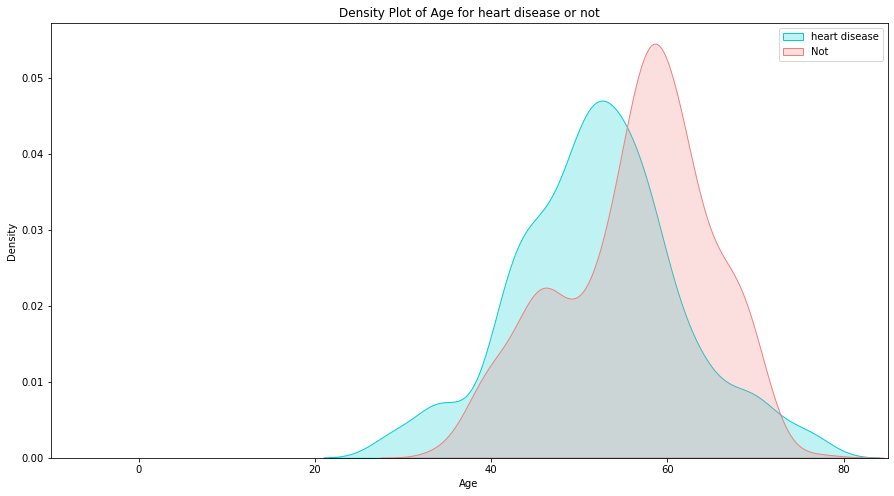

In [43]:
# distribution for heart disease or not is very different. younger gerenations 
# tend to have heart disease than elders 
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df["age"][df.target == 1], color="darkturquoise", shade=True)
sns.kdeplot(df["age"][df.target == 0], color="lightcoral", shade=True)
plt.legend(['heart disease', 'Not'])
plt.title('Density Plot of Age for heart disease or not')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

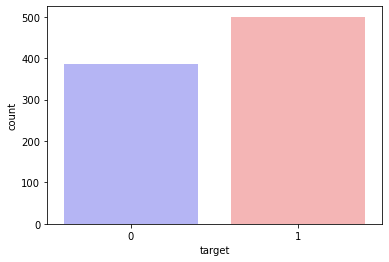

In [44]:
sns.countplot(x="target", data=df, palette="bwr") # target
plt.show()

<AxesSubplot:xlabel='count', ylabel='cp'>

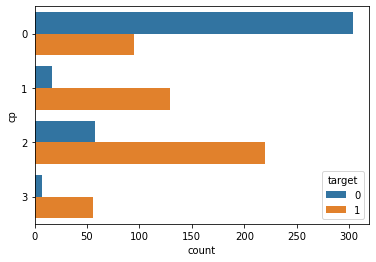

In [47]:
sns.countplot(y="cp", data=df, hue="target")

<AxesSubplot:xlabel='target', ylabel='count'>

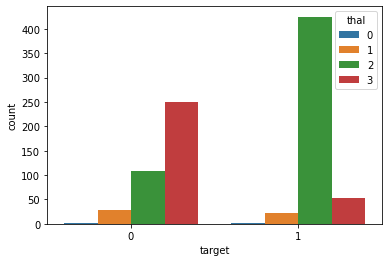

In [48]:
sns.countplot(data=df, x='target', hue='thal')

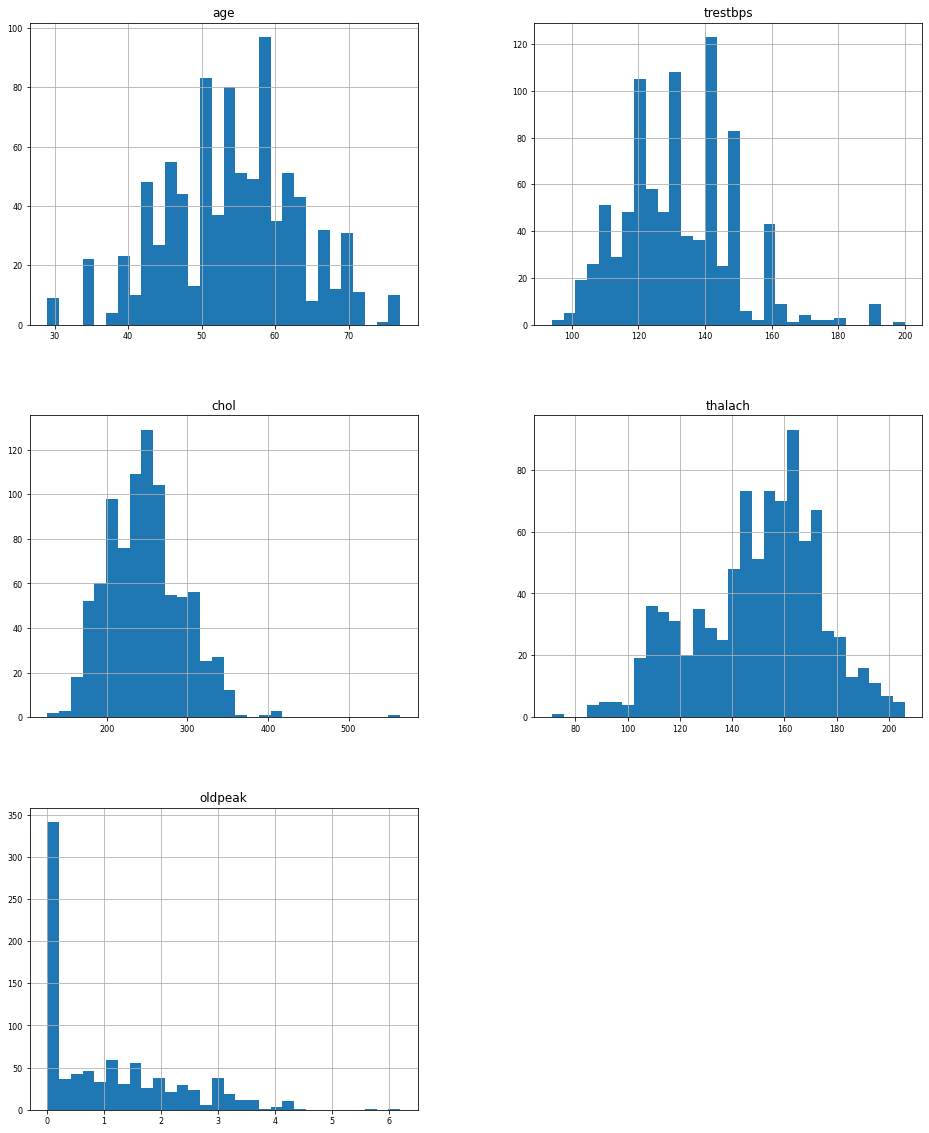

In [121]:
# not normal 
datanum.hist(figsize=(16, 20), bins=30, xlabelsize=8, ylabelsize=8); 

<AxesSubplot:>

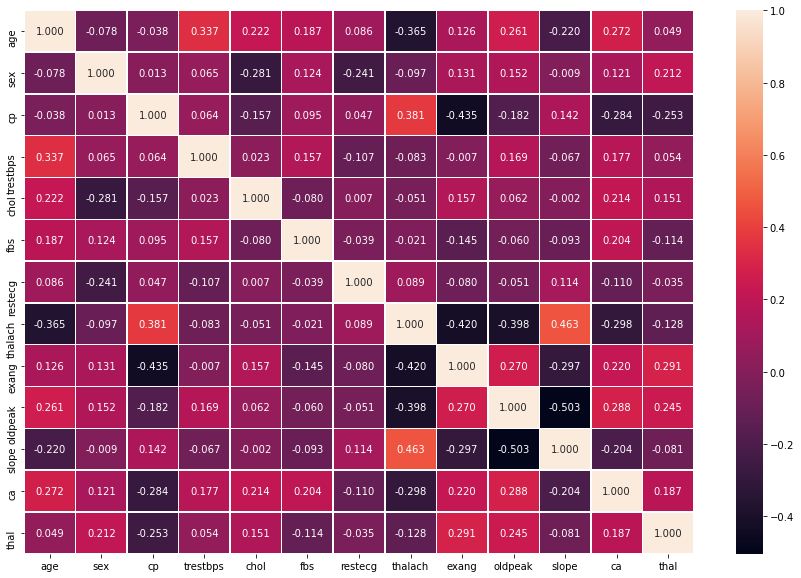

In [126]:
cor_mat=(df.drop('target',axis=1)).corr(method='pearson')
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".3f")

## Preprocessing

In [127]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: preprocess data
    df.dropna(inplace=True)
    return df
data = preprocessing_data(df)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
1,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
2,71,0,1,160,303,0,1,163,0,0.4,2,2,2,1
3,71,0,1,160,304,0,1,164,0,0.4,2,2,2,1
4,71,0,1,160,305,0,1,165,0,0.4,2,2,2,1


In [128]:
# ham nay dung de chuyen bien category thanh cac bien dang so roi rac
def ordinal_encode(data):
  """
  :param df: pandas DataFrame
  :return: pandas DataFrame
  """
  encoding_data=data.copy()
  encoder=ce.OrdinalEncoder(encoding_data)
  data_encoded=encoder.fit_transform(encoding_data)
  return data_encoded

## Feature Engineering

<AxesSubplot:>

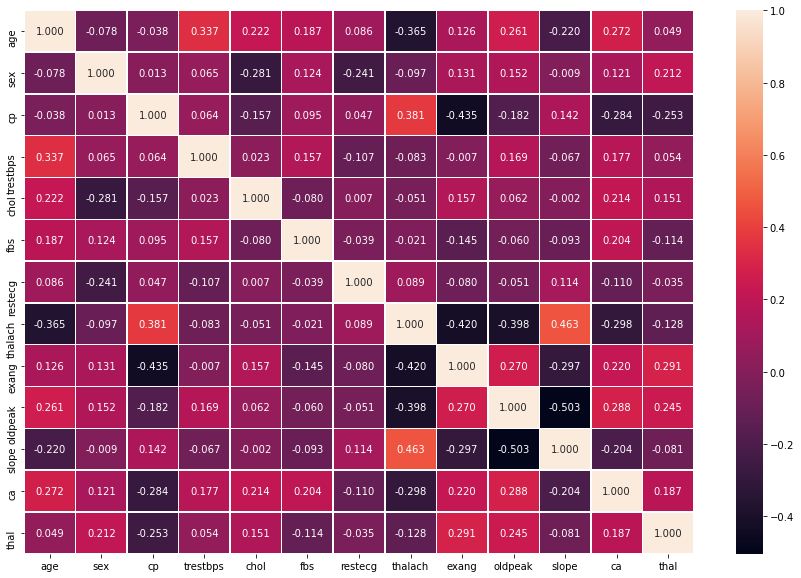

In [130]:
# Heatmap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    
    df_object_columns = df.iloc[:, :].select_dtypes(include=['object']).columns
    if len(df_object_columns) != 0:
        df_object_columns_removed = df.drop(df_object_columns,axis=1)
        df_le = df[df_object_columns]
        df_le = ordinal_encode(df_le)
        df = pd.concat([df_object_columns_removed, df_le], axis=1)
    # Todo: Normalize your data
    return df

data = apply_feature_engineering(data)
cor_mat=(data.drop('target',axis=1)).corr(method='pearson')
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".3f")

In [131]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    target = df.columns[-1]
    X = df.drop(target, axis=1, inplace=False).values
    y = df[target]
    return X, y

X, y = prepare_X_y(data)

# Apply machine learning model

## Train-test split

In [132]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 101
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

## Build SK-learn model

In [133]:
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
def build_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """
    pipe = Pipeline([
        ('scaler', StandardScaler()),  # Step 1: Standardize the data
        ('logreg', LogisticRegression())  # Step 2: Logistic regression
        ])

    # Define parameter grid
    param_grid = {
        'logreg__penalty': ['l1', 'l2'], 
        'logreg__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], # L1 or L2 regularization
    }

    # Define grid search object
    grid = GridSearchCV(pipe, param_grid=param_grid)

    # Fit the grid search object to the data
    grid.fit(X, y)
    return grid

def calculate_performance(y_true, y_pred):
    """
    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """

    # Todo: return your error value like accuracy, f1score, ...
    print("precision", precision_score(y_true,y_pred))
    print("recall", recall_score(y_true,y_pred))
    print("accuracy", accuracy_score(y_true,y_pred))
    print("F1", f1_score(y_true,y_pred))
    print("Classification report: \n", classification_report(y_true , y_pred))

    # Todo: Only choose one of them as your score for the question 7
    main_score = recall_score(y_true,y_pred)
    return main_score

In [134]:
# Use logistic model Regression. 
# Try to apply different *solver* and *penalty* to find the best one.
model = build_model(trainX, trainY)
print("Best parameter =%0.3f:" % model.best_score_)
print(model.best_params_)

Best parameter =0.958:
{'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}


c:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HP\anaconda3\lib\site-packages\sklearn\pipeline.py", line 406, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  

In [135]:
# Compare on training dataset
#Todo: output your error
pred = model.predict(trainX)
print(mean_absolute_error(trainY,pred))

#Todo: output your error
pred = model.predict(testX)
print(mean_absolute_error(testY,pred))

0.035483870967741936
0.07142857142857142


### 7.Which metric is your main metric and why? Which solver and penalty have you chosen? (<= 100 words)
* chon tham so recall boi vi khi du doan benh cua benh nhan thi ta can du doan chinh xac nguoi bi benh va nguoi khong bi benh. 
* solver  = liblinear theo nhu tren sklearn thi liblinear su dung cho bo du lieu nho va binary classification.
* penality = L2 con theo ham phia tren thi no chon l1. theo em tim hieu thi L1, L2 kha giong nhau nhung L1 mat nhieu chi phi tinh toan hon va su dung no khi bo du lieu co kha lon feature. con trong bo du lieu nay l2 la du.

In [136]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    return calculate_performance(trainY,model.predict(trainX))
print('main_score recall : ', get_conclusion())

precision 0.9603399433427762
recall 0.9769452449567724
accuracy 0.964516129032258
F1 0.9685714285714286
Classification report: 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       273
           1       0.96      0.98      0.97       347

    accuracy                           0.96       620
   macro avg       0.97      0.96      0.96       620
weighted avg       0.96      0.96      0.96       620

main_score recall :  0.9769452449567724
